# Driver Standing and Constructor Standings Predictions

This projects aims to predict future standings based on past performance trends

Setting up the dataset for testing and training

In [44]:
#Loading data sets
import pandas as pd

driver_standings = pd.read_csv('f1/driver_standings.csv')
constructor_standings = pd.read_csv('f1/constructor_standings.csv')
races = pd.read_csv('f1/races.csv')
drivers = pd.read_csv('f1/drivers.csv')
constructors = pd.read_csv('f1/constructors.csv')
results = pd.read_csv('f1/results.csv')

In [45]:
# Cleaning the datasets
driver_standings.drop(['positionText'], axis=1, inplace=True)
constructor_standings.drop(['positionText'], axis=1, inplace=True)
races.drop(['url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1, inplace=True)
drivers.drop(['driverRef', 'number', 'forename', 'dob', 'nationality', 'url'], axis=1, inplace=True)
constructors.drop(['url', 'name', 'nationality'], axis=1, inplace=True)


In [46]:
# Merging the datasets
merged = pd.merge(results, races, on='raceId', how='outer')
merged = pd.merge(merged, driver_standings, on=['raceId', 'driverId'], how='left')
merged = pd.merge(merged, constructor_standings, on=['raceId', 'constructorId'], how='left')
merged = pd.merge(merged, drivers, on='driverId', how='left')
merged = pd.merge(merged, constructors, on='constructorId', how='left')

In [47]:
# Filter to specific years (2018 - 2022)
merged = merged[(merged['year'] >= 2018) & (merged['year'] <= 2022)]

# Sort the merged dataset by date and round
merged.sort_values(by=['year', 'round'], ascending=[True, True])


,resultId,raceId,driverId,constructorId,number,grid,position_x,positionText,positionOrder,points_x,...,points_y,position_y,wins_x,constructorStandingsId,points,position,wins_y,code,surname,constructorRef
23780,23782.0,989,20.0,6.0,5,3.0,1,1,1.0,25.0,...,25.0,1.0,1.0,26933.0,40.0,1.0,1.0,VET,Vettel,ferrari
23781,23783.0,989,1.0,131.0,44,1.0,2,2,2.0,18.0,...,18.0,2.0,0.0,26934.0,22.0,2.0,0.0,HAM,Hamilton,mercedes
23782,23784.0,989,8.0,6.0,7,2.0,3,3,3.0,15.0,...,15.0,3.0,0.0,26933.0,40.0,1.0,1.0,RAI,Räikkönen,ferrari
23783,23785.0,989,817.0,9.0,3,8.0,4,4,4.0,12.0,...,12.0,4.0,0.0,26935.0,20.0,3.0,0.0,RIC,Ricciardo,red_bull
23784,23786.0,989,4.0,1.0,14,10.0,5,5,5.0,10.0,...,10.0,5.0,0.0,26936.0,12.0,4.0,0.0,ALO,Alonso,mclaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841.0,1096,854.0,210.0,47,12.0,16,16,16.0,0.0,...,12.0,16.0,0.0,28395.0,37.0,8.0,0.0,MSC,Schumacher,haas
25836,25842.0,1096,825.0,210.0,20,16.0,17,17,17.0,0.0,...,25.0,13.0,0.0,28395.0,37.0,8.0,0.0,MAG,Magnussen,haas
25837,25843.0,1096,1.0,131.0,44,5.0,18,18,18.0,0.0,...,240.0,6.0,0.0,28394.0,515.0,3.0,1.0,HAM,Hamilton,mercedes
25838,25844.0,1096,849.0,3.0,6,20.0,19,19,19.0,0.0,...,2.0,20.0,0.0,28400.0,8.0,10.0,0.0,LAT,Latifi,williams


In [48]:
# Renaming columns for clarity
merged.rename(columns={
    'position': 'race_finish_position',
    'positionOrder': 'race_position_order',
    'points_x': 'driver_season_points',
    'points_y': 'constructor_season_points',
    'wins_x': 'driver_season_wins',
    'wins_y': 'constructor_season_wins',
    'position_x': 'driver_championship_standings',
    'position_y': 'constructor_championship_standings'
}, inplace=True)

In [49]:
# Handling missing values
# For numerical columns: filling with the mean or median
numerical_cols = merged.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    merged[col].fillna(merged[col].mean(), inplace=True)

# For categorical columns: filling with the mode
categorical_cols = merged.select_dtypes(include=['object']).columns
for col in categorical_cols:
    merged[col].fillna(merged[col].mode()[0], inplace=True)

In [50]:
# Save the cleaned and preprocessed merged dataset
merged.to_csv('f1/merged_dataset.csv', index=False)


In [51]:
merged = pd.get_dummies(merged, columns=['circuitId', 'constructorId'], drop_first=True)

In [52]:
print(merged.columns)

Index(['resultId', 'raceId', 'driverId', 'number', 'grid',
       'driver_championship_standings', 'positionText', 'race_position_order',
       'driver_season_points', 'laps', 'time_x', 'milliseconds', 'fastestLap',
       'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year',
       'round', 'name', 'date', 'time_y', 'driverStandingsId',
       'constructor_season_points', 'constructor_championship_standings',
       'driver_season_wins', 'constructorStandingsId', 'points',
       'race_finish_position', 'constructor_season_wins', 'code', 'surname',
       'constructorRef', 'circuitId_3', 'circuitId_4', 'circuitId_5',
       'circuitId_6', 'circuitId_7', 'circuitId_9', 'circuitId_10',
       'circuitId_11', 'circuitId_13', 'circuitId_14', 'circuitId_15',
       'circuitId_17', 'circuitId_18', 'circuitId_20', 'circuitId_21',
       'circuitId_22', 'circuitId_24', 'circuitId_32', 'circuitId_34',
       'circuitId_39', 'circuitId_69', 'circuitId_70', 'circuitId_71',
       'ci

### Model 1

In [53]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2

In [54]:
# Loading the merged dataset
file_path = 'f1/merged_dataset.csv'
data = pd.read_csv(file_path)

In [55]:
# Convert target columns to numeric (float) and handle any missing or non-numeric values
data['driver_championship_standings'] = pd.to_numeric(data['driver_championship_standings'], errors='coerce').fillna(0)
data['constructor_championship_standings'] = pd.to_numeric(data['constructor_championship_standings'], errors='coerce').fillna(0)

In [56]:
# Selecting features and target
feature_columns = ['grid', 
                   'driver_season_points', 
                   'driver_season_wins', 
                   'constructor_season_points', 
                   'constructor_season_wins', 
                   'laps', 
                   'race_position_order'
                   ]
X = data[feature_columns]
y_driver = data['driver_championship_standings']  # Target for driver standings
y_constructor = data['constructor_championship_standings']  # Target for constructor standings

In [57]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train_driver, y_test_driver = train_test_split(X, y_driver, test_size=0.2, random_state=42)
_, _, y_train_constructor, y_test_constructor = train_test_split(X, y_constructor, test_size=0.2, random_state=42)

In [58]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Define a function to create the Keras model
def create_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', 
              input_shape=input_shape, 
              kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.5),
        Dense(64, activation='relu', 
              kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.5),
        Dense(32, activation='relu', 
              kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [60]:
# Correct the input shape for model creation
input_shape = (X_train_scaled.shape[1], )  # Number of features

# Create and train the model for driver standings
model_driver1 = create_model(input_shape)
history_driver1 = model_driver1.fit(X_train_scaled, 
                                  y_train_driver, 
                                  epochs=100, 
                                  batch_size=10, 
                                  validation_split=0.2)

# Evaluate the model for driver standings
y_pred_driver = model_driver1.predict(X_test_scaled)
mse_driver = tf.keras.losses.MeanSquaredError()
print("Driver Standings - Mean Squared Error:", mse_driver(y_test_driver, y_pred_driver).numpy())

# Create and train the model for constructor standings
model_constructor1 = create_model(input_shape)
history_constructor1 = model_constructor1.fit(X_train_scaled, 
                                            y_train_constructor, 
                                            epochs=100, 
                                            batch_size=10, 
                                            validation_split=0.2)

# Evaluate the model for constructor standings
y_pred_constructor = model_constructor1.predict(X_test_scaled)
print("Constructor Standings - Mean Squared Error:", mse_driver(y_test_constructor, y_pred_constructor).numpy())


Epoch 1/100


/Users/ali/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 81.2403 - val_loss: 25.9553
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 35.7895 - val_loss: 23.4084
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 30.3216 - val_loss: 22.7568
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 28.9432 - val_loss: 23.5383
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 27.9988 - val_loss: 22.5750
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 27.4289 - val_loss: 17.5145
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 23.4985 - val_loss: 17.2910
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 23.9182 - val_loss: 16.9717
Epoch 9/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 24.0315 - val_loss: 16.2451
Epoch 10/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 22.2079 - val_loss: 15.6539
Epoch 11/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 19.7778 - val_loss: 14.5712
Epoch 12/10

/Users/ali/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - loss: 115.2845 - val_loss: 21.5389
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 37.0983 - val_loss: 18.3128
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 33.4178 - val_loss: 17.1938
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 29.9815 - val_loss: 16.6962
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 30.0858 - val_loss: 16.0653
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 28.6282 - val_loss: 14.0865
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 24.9170 - val_loss: 14.4906
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 24.3451 - val_loss: 12.6675
Epoch 9/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 26.2315 - val_loss: 12.0594
Epoch 10/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 22.8606 - val_loss: 11.0294
Epoch 11/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 21.7021 - val_loss: 13.7249
Epoch 12

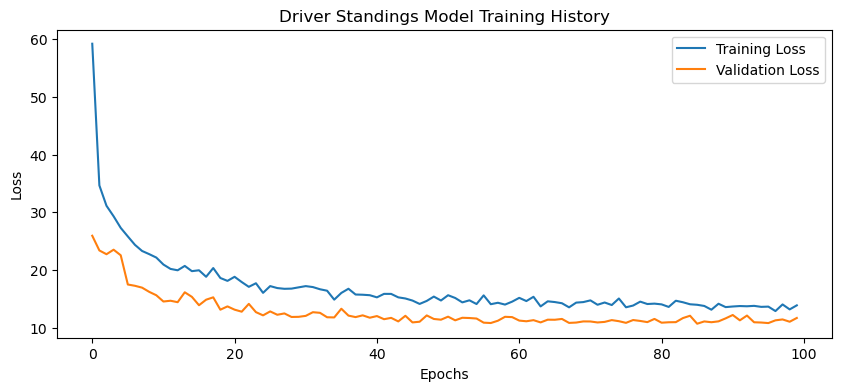

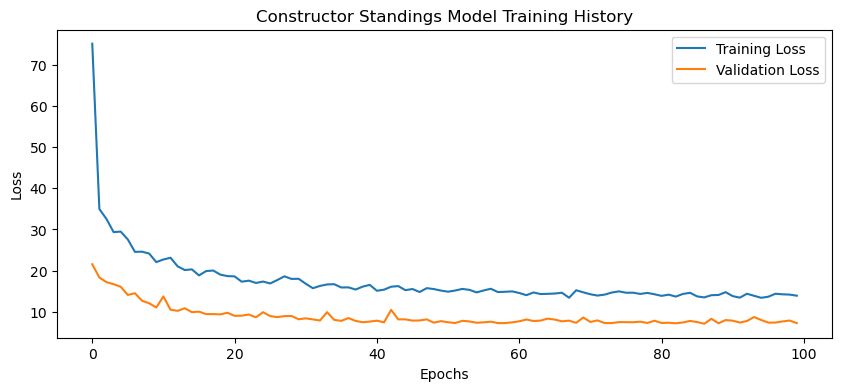

In [66]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history, title):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the training history for driver standings model
plot_training_history(history_driver1, 'Driver Standings Model Training History')

# Plot the training history for constructor standings model
plot_training_history(history_constructor1, 'Constructor Standings Model Training History')


In [63]:
# Aggregating driver data
driver_stats = data[data['driverId'] == 4.0][feature_columns].mean()

# Converting to DataFrame for scaling
driver_stats_df = pd.DataFrame([driver_stats])

# Scaling features
driver_stats_scaled = scaler.transform(driver_stats_df)

# Predict driver standings
predicted_driver_standing = model_driver1.predict(driver_stats_scaled)
print(f"Predicted Driver Standing for Driver ID 1.0:", predicted_driver_standing[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Driver Standing for Driver ID 1.0: 9.585121


In [64]:
# Aggregating constructor data
constructor_stats = data[data['constructorId'] == 131.0][feature_columns].mean()

# Converting to DataFrame for scaling
constructor_stats_df = pd.DataFrame([constructor_stats])

# Scaling features
constructor_stats_scaled = scaler.transform(constructor_stats_df)

# Predict constructor standings
predicted_constructor_standing = model_constructor1.predict(constructor_stats_scaled)
print(f"Predicted Constructor Standing for Constructor ID 213.0:", predicted_constructor_standing[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Constructor Standing for Constructor ID 213.0: 3.5994427


### Model 2

In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to convert fastest lap time to seconds
def convert_to_seconds(time_str):
    if isinstance(time_str, str) and time_str != '\\N':
        mins, secs = map(float, time_str.split(':'))
        return mins * 60 + secs
    return np.nan

# Load the merged dataset
data = pd.read_csv('f1/merged_dataset.csv')

# Adding new features and handling '\\N'
data['fastestLapTime_sec'] = data['fastestLapTime'].replace('\\N', np.nan).apply(convert_to_seconds)
data['fastestLapSpeed'] = pd.to_numeric(data['fastestLapSpeed'].replace('\\N', np.nan), errors='coerce').fillna(0)

# Ensure all feature columns are numeric
for col in ['grid', 'driver_season_points', 'driver_season_wins', 'constructor_season_points', 'constructor_season_wins', 'laps', 'race_position_order', 'fastestLapTime_sec', 'fastestLapSpeed']:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

# Convert target columns to numeric
data['driver_championship_standings'] = pd.to_numeric(data['driver_championship_standings'], errors='coerce').fillna(0)
data['constructor_championship_standings'] = pd.to_numeric(data['constructor_championship_standings'], errors='coerce').fillna(0)

# Feature selection
feature_columns = ['grid', 'driver_season_points', 'driver_season_wins', 'constructor_season_points', 'constructor_season_wins', 'laps', 'race_position_order', 'fastestLapTime_sec', 'fastestLapSpeed']
X = data[feature_columns]
y_driver = data['driver_championship_standings']
y_constructor = data['constructor_championship_standings']

# Splitting the data
X_train, X_test, y_train_driver, y_test_driver = train_test_split(X, y_driver, test_size=0.2, random_state=42)
X_train_constructor, X_test_constructor, y_train_constructor, y_test_constructor = train_test_split(X, y_constructor, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model definition
def create_model(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.5),
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the model for driver standings
model_driver2 = create_model(X_train_scaled.shape[1])
history_driver2 = model_driver2.fit(X_train_scaled, 
                                   y_train_driver, 
                                   epochs=100, 
                                   batch_size=10, 
                                   validation_split=0.2
                                   )

# Evaluate the model for driver standings
y_pred_driver = model_driver2.predict(X_test_scaled)
mse_driver = tf.keras.losses.MeanSquaredError()
driver_mse = mse_driver(y_test_driver, y_pred_driver).numpy()
print("Driver Standings - Mean Squared Error:", driver_mse)

# Create and train the model for constructor standings
model_constructor2 = create_model(X_train_scaled.shape[1])
history_constructor2 = model_constructor2.fit(X_train_scaled, 
                                              y_train_constructor, 
                                              epochs=100, 
                                              batch_size=10, 
                                              validation_split=0.2
                                              )

# Evaluate the model for constructor standings
y_pred_constructor = model_constructor2.predict(X_test_scaled)
mse_constructor = tf.keras.losses.MeanSquaredError()
constructor_mse = mse_constructor(y_test_constructor, y_pred_constructor).numpy()
print("Constructor Standings - Mean Squared Error:", constructor_mse)


Epoch 1/100


/Users/ali/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 84.5246 - val_loss: 35.1594
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 39.2718 - val_loss: 27.5140
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 31.3967 - val_loss: 23.2347
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 29.2406 - val_loss: 20.0041
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 24.8377 - val_loss: 18.4101
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 23.3270 - val_loss: 17.1108
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 22.1338 - val_loss: 15.6461
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 22.6631 - val_loss: 15.1020
Epoch 9/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 20.2077 - val_loss: 13.9001
Epoch 10/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 18.5287 - val_loss: 12.6386
Epoch 11/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 17.1329 - val_loss: 12.0612
Epoch 12/10

/Users/ali/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 115.8686 - val_loss: 33.9822
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 44.4001 - val_loss: 26.8204
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 37.9387 - val_loss: 22.7360
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 32.1952 - val_loss: 21.2453
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 29.1421 - val_loss: 18.2954
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 28.7600 - val_loss: 16.2815
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 25.5761 - val_loss: 15.5068
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 22.3911 - val_loss: 15.5841
Epoch 9/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 23.2441 - val_loss: 13.4491
Epoch 10/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 22.8697 - val_loss: 13.1601
Epoch 11/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 20.9923 - val_loss: 13.1751
Epoch 12/1

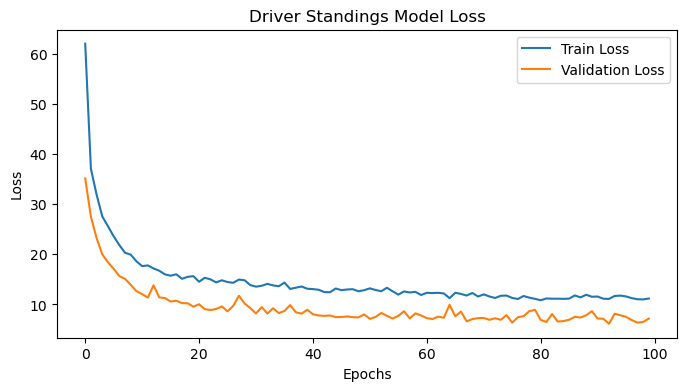

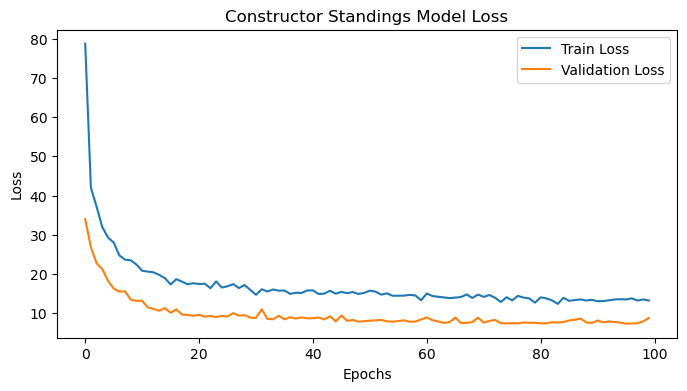

In [67]:

import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history_driver2, 'Driver Standings Model Loss')
plot_history(history_constructor2, 'Constructor Standings Model Loss')


In [78]:
# Aggregating driver data
driver_stats = data[data['driverId'] == 830.0][feature_columns].mean()

# Converting to DataFrame for scaling
driver_stats_df = pd.DataFrame([driver_stats])

# Scaling features
driver_stats_scaled = scaler.transform(driver_stats_df)

# Predict driver standings
predicted_driver_standing = model_driver2.predict(driver_stats_scaled)
print(f"Predicted Driver Standing for Driver ID:", predicted_driver_standing[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Driver Standing for Driver ID: 2.1788163


In [80]:
# Aggregating constructor data
constructor_stats = data[data['constructorId'] == 9.0][feature_columns].mean()

# Converting to DataFrame for scaling
constructor_stats_df = pd.DataFrame([constructor_stats])

# Scaling features
constructor_stats_scaled = scaler.transform(constructor_stats_df)

# Predict constructor standings
predicted_constructor_standing = model_constructor2.predict(constructor_stats_scaled)
print(f"Predicted Constructor Standing for Constructor ID:", predicted_constructor_standing[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Constructor Standing for Constructor ID: 3.4331698


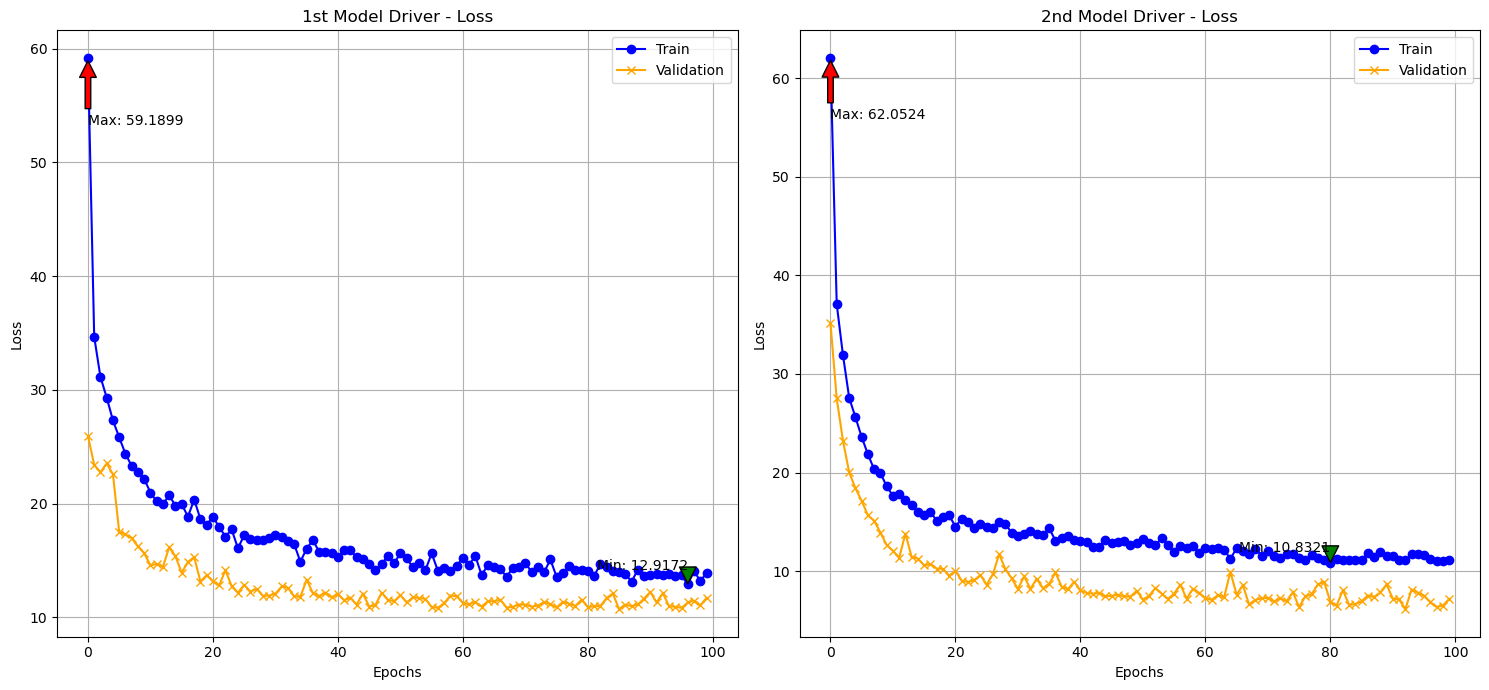

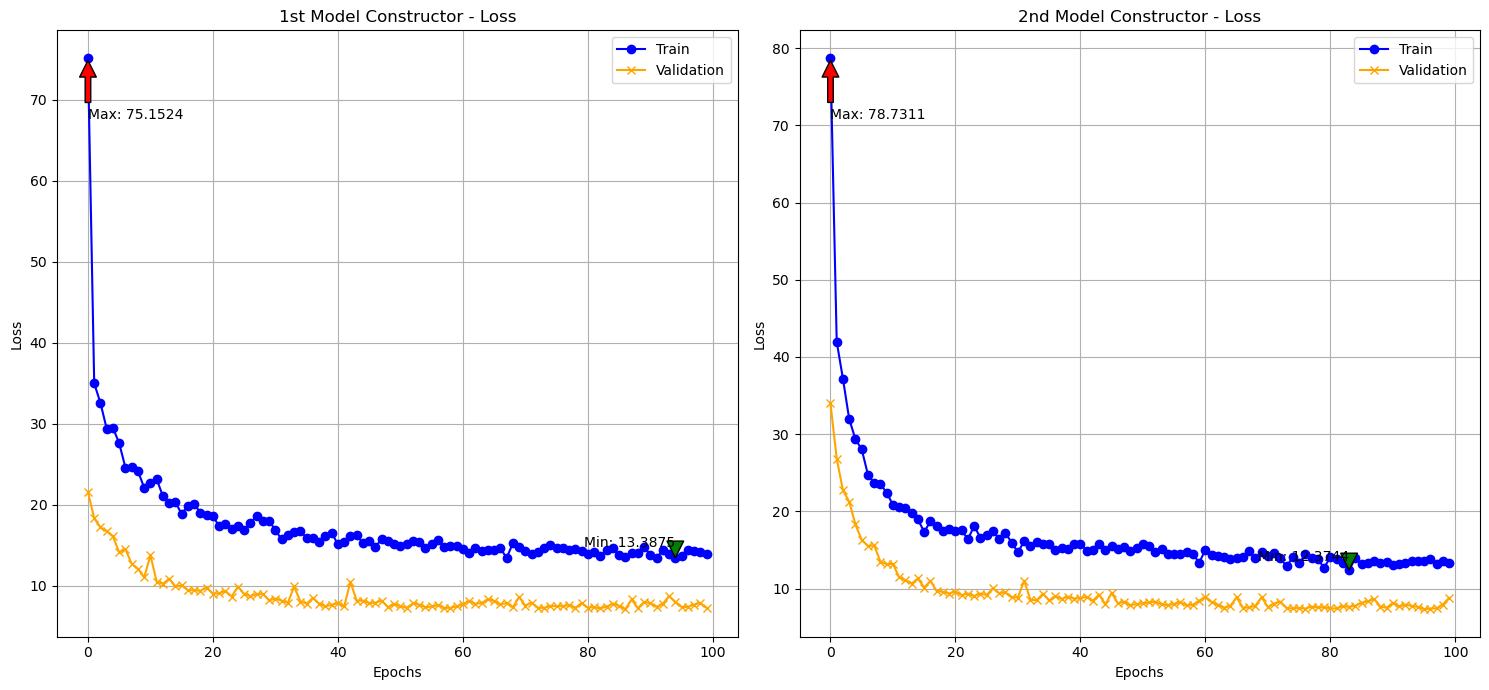

In [77]:
import matplotlib.pyplot as plt

def compare_models(history1, history2, title1, title2, metric='loss'):
    plt.figure(figsize=(15, 7))

    # Function to annotate minimum and maximum values on the plot
    def annotate_min_max(history, ax, metric='loss'):
        min_val = min(history.history[metric])
        max_val = max(history.history[metric])
        min_epoch = history.history[metric].index(min_val)
        max_epoch = history.history[metric].index(max_val)
        
        ax.annotate(f'Min: {min_val:.4f}', xy=(min_epoch, min_val), xytext=(min_epoch, min_val+0.1*min_val),
                    arrowprops=dict(facecolor='green', shrink=0.05),
                    horizontalalignment='right')
        ax.annotate(f'Max: {max_val:.4f}', xy=(max_epoch, max_val), xytext=(max_epoch, max_val-0.1*max_val),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    horizontalalignment='left')

    # Plotting model 1
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(history1.history[metric], label='Train', color='blue', marker='o')
    ax1.plot(history1.history['val_' + metric], label='Validation', color='orange', marker='x')
    ax1.title.set_text(f'{title1} - {metric.capitalize()}')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel(metric.capitalize())
    ax1.legend()
    ax1.grid(True)
    annotate_min_max(history1, ax1, metric)

    # Plotting model 2
    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(history2.history[metric], label='Train', color='blue', marker='o')
    ax2.plot(history2.history['val_' + metric], label='Validation', color='orange', marker='x')
    ax2.title.set_text(f'{title2} - {metric.capitalize()}')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel(metric.capitalize())
    ax2.legend()
    ax2.grid(True)
    annotate_min_max(history2, ax2, metric)

    plt.tight_layout()
    plt.show()

# Comparing model_driver1 and model_driver2
compare_models(history_driver1, history_driver2, "1st Model Driver", "2nd Model Driver", metric='loss')

# Comparing model_constructor1 and model_constructor2
compare_models(history_constructor1, history_constructor2, "1st Model Constructor", "2nd Model Constructor", metric='loss')
